### Python Setup

In [30]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

### Data

In [31]:
# import data
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "height.csv"

df = pd.read_csv(ROOT + DATA)

In [32]:
# show head of dataframe
df.head()

,Name,ID%,Height,Average Height Parents,Gender
0,Stefanie,1,162,161.5,female
1,Peter,2,163,163.5,male
2,Stefanie,3,163,163.2,female
3,Manuela,4,164,165.1,female
4,Simon,5,164,163.2,male


In [33]:
# show tail of dataframe
df.tail()

,Name,ID%,Height,Average Height Parents,Gender
15,Marc,16,166,166.5,male
16,Ralph,17,166,166.6,male
17,Tom,18,167,166.2,male
18,Steven,19,167,167.3,male
19,Emanuel,20,168,168.5,male


In [34]:
# data overview (metadata)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    20 non-null     object 
 1   ID%                     20 non-null     int64  
 2   Height                  20 non-null     int64  
 3   Average Height Parents  20 non-null     float64
 4    Gender                 20 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 928.0+ bytes


In [35]:
# show all variables
df.columns

Index(['Name', 'ID%', 'Height', 'Average Height Parents', ' Gender'], dtype='object')

### Tidying Data

In [36]:
# change data types
df["Name"] = pd.Categorical(df["Name"])
df["ID%"] = pd.Categorical(df["ID%"])
df[" Gender"] = pd.Categorical(df[" Gender"])

df.rename(columns = {
    "Average Height Parents": "height_parents", "Name": "name", "ID%": "id", " Gender": "gender", "Height": "height"},
    inplace=True
    )

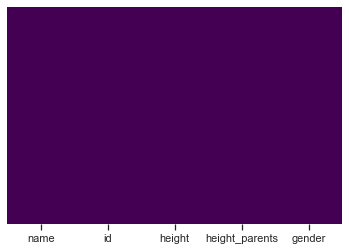

In [37]:
# show missing values (will be displayed in yellow)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis");

In [38]:
# check column-wise distribution of null values
print(df.isnull().sum())

name              0
id                0
height            0
height_parents    0
gender            0
dtype: int64


### Transform Data

In [39]:
# summary statistics for all numerical columns
round(df.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
height,20.0,165.00,1.49,162.0,164.0,165.00,166.00,168.0
height_parents,20.0,165.35,1.69,161.5,164.3,165.35,166.35,168.5


In [40]:
# grouped summary statistics for all numerical columns
df.groupby(["gender"]).describe().T

gender                    female        male
height         count   11.000000    9.000000
               mean   164.363636  165.777778
               std      1.120065    1.563472
               min    162.000000  163.000000
               25%    164.000000  165.000000
               50%    165.000000  166.000000
               75%    165.000000  167.000000
               max    166.000000  168.000000
height_parents count   11.000000    9.000000
               mean   164.863636  165.944444
               std      1.593909    1.693451
               min    161.500000  163.200000
               25%    164.200000  165.500000
               50%    165.100000  166.200000
               75%    165.650000  166.600000
               max    167.400000  168.500000

In [41]:
# summary statistics for all categorical columns
df.describe(include=["category"])

,name,id,gender
count,20,20,20
unique,19,20,2
top,Stefanie,1,female
freq,2,1,11


### Visualize Data

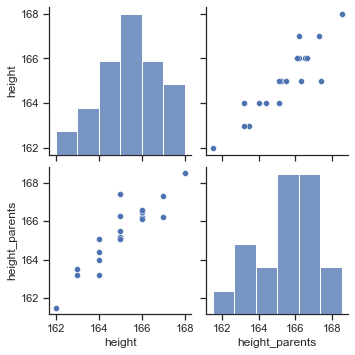

In [42]:
# histogram with seaborn
sns.pairplot(data=df);

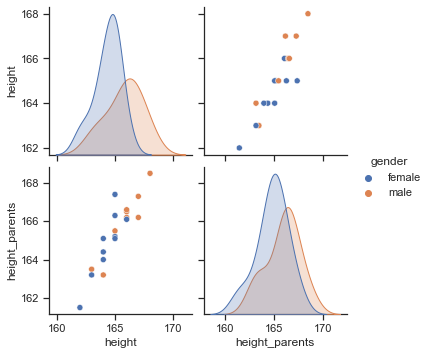

In [43]:
# histogram with seaborn
sns.pairplot(data=df, hue="gender");

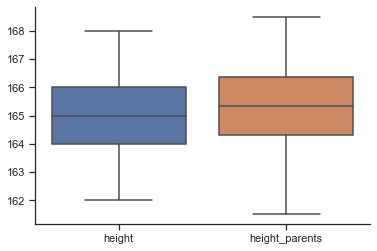

In [44]:
# boxplot
sns.boxplot(data=df);

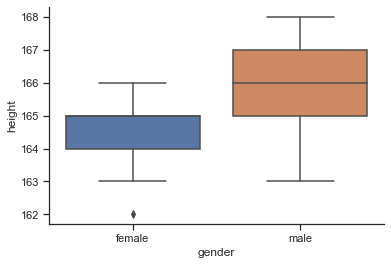

In [45]:
# boxplot
sns.boxplot(data=df, y="height", x="gender");

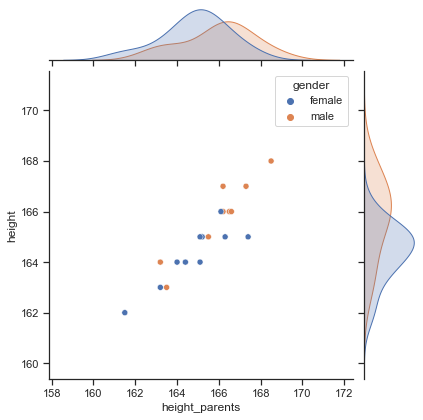

In [46]:
# check relaionship with a joint plot
sns.jointplot(x="height_parents", y ="height", hue="gender", data=df)

### Mean

In [47]:
# calculate the mean
df["height"].mean()

165.0

In [48]:
# add the mean (average) to the DataFrame
df = df.assign(average = df["height"].mean())

df.head()

,name,id,height,height_parents,gender,average
0,Stefanie,1,162,161.5,female,165.0
1,Peter,2,163,163.5,male,165.0
2,Stefanie,3,163,163.2,female,165.0
3,Manuela,4,164,165.1,female,165.0
4,Simon,5,164,163.2,male,165.0


Text(1, 165.2, 'mean = 165')

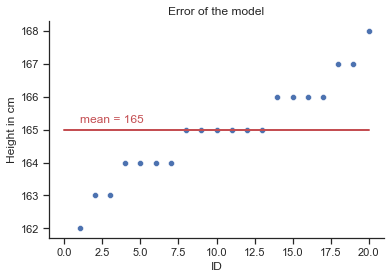

In [49]:
# create scatterplot
plt = sns.scatterplot(x="id", y ="height", data=df);

# labels and title
plt.set(xlabel="ID", ylabel="Height in cm", title="Error of the model");

# add our mean value
plt.plot([0, 20], [165, 165], linewidth=2, color="r");
plt.text(1, 165.2, "mean = 165", rotation=0, color="r")


### Regression Model

In [50]:
# fit linear model with statsmodels.formular.api
lm = smf.ols(formula="height ~ height_parents", data=df).fit()

# add the regression predictions (as "pred") to DataFrame
df["pred"] = lm.predict()

In [51]:
df.head()

,name,id,height,height_parents,gender,average,pred
0,Stefanie,1,162,161.5,female,165.0,161.920285
1,Peter,2,163,163.5,male,165.0,163.520137
2,Stefanie,3,163,163.2,female,165.0,163.280159
3,Manuela,4,164,165.1,female,165.0,164.800018
4,Simon,5,164,163.2,male,165.0,163.280159


In [52]:
# summary of regression results
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     84.67
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           3.16e-08
Time:                        10:37:10   Log-Likelihood:                -18.386
No. Observations:                  20   AIC:                             40.77
Df Residuals:                      18   BIC:                             42.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         32.7322     14.375      2.277      0.035       2.532      62.933
height_parents     0.7999      0.087      9.202      0.000       0.617       0.983
==============================================================================
Omnibus:                        4.511   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                2.374
Skew:                          -0.573   Prob(JB):                        0.305
Kurtosis:                       4.239   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# example of how regression works

# parameters
b_0 = 30.9651
b_1 = 0.8121

# make a prediction for X = 200
X = 200

prediction = b_0 + b_1*(X)

print(round(prediction, 2))

193.39


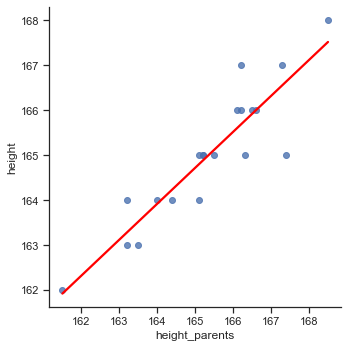

In [54]:
# plot regression line
sns.lmplot(x="height_parents", y ="height", data=df, line_kws={"color": "red"}, height=5, ci=None);

## Residuals and R2

### Mean

In [55]:
# calculate error (observation - average) and assign to DataFrame
df = df.assign(error = (df["height"] - df["average"]))

df.head()

,name,id,height,height_parents,gender,average,pred,error
0,Stefanie,1,162,161.5,female,165.0,161.920285,-3.0
1,Peter,2,163,163.5,male,165.0,163.520137,-2.0
2,Stefanie,3,163,163.2,female,165.0,163.280159,-2.0
3,Manuela,4,164,165.1,female,165.0,164.800018,-1.0
4,Simon,5,164,163.2,male,165.0,163.280159,-1.0


In [56]:
# calculate sum of errors
df.error.sum()

0.0

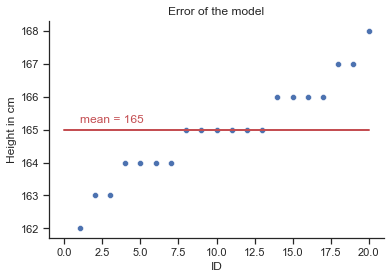

In [57]:
# create scatterplot
plt = sns.scatterplot(x="id", y="height", data=df);
plt.set(xlabel="ID", ylabel="Height in cm", title="Error of the model");
plt.plot([0, 20], [165, 165], linewidth=2, color="r");
plt.text(1, 165.2, "mean = 165", rotation=0, color="r");

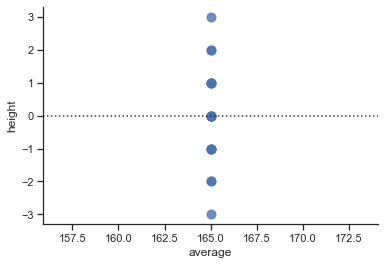

In [58]:
# residual plot
sns.residplot(x="average", y="height", data=df, scatter_kws={"s": 80});

In [59]:
# calculate squared error and assign to DataFrame
df = df.assign(error_sq = (df["height"] - df["average"])**2)

df.head()

,name,id,height,height_parents,gender,average,pred,error,error_sq
0,Stefanie,1,162,161.5,female,165.0,161.920285,-3.0,9.0
1,Peter,2,163,163.5,male,165.0,163.520137,-2.0,4.0
2,Stefanie,3,163,163.2,female,165.0,163.280159,-2.0,4.0
3,Manuela,4,164,165.1,female,165.0,164.800018,-1.0,1.0
4,Simon,5,164,163.2,male,165.0,163.280159,-1.0,1.0


In [60]:
# calculate sum of squared error (in case of mean total error)
TSS = df.error_sq.sum()

print("Sum of squared error (TSS) of model 1:", TSS)

Sum of squared error (TSS) of model 1: 42.0


### Regression

In [61]:
lm.resid.sum()

6.139089236967266e-12

In [62]:
# obtain the residuals from statsmodel
df["error_2"] = lm.resid

# square the residuals
df["error_sq_2"] = df["error_2"]**2

df.head()

,name,id,height,height_parents,gender,average,pred,error,error_sq,error_2,error_sq_2
0,Stefanie,1,162,161.5,female,165.0,161.920285,-3.0,9.0,0.079715,0.006355
1,Peter,2,163,163.5,male,165.0,163.520137,-2.0,4.0,-0.520137,0.270542
2,Stefanie,3,163,163.2,female,165.0,163.280159,-2.0,4.0,-0.280159,0.078489
3,Manuela,4,164,165.1,female,165.0,164.800018,-1.0,1.0,-0.800018,0.640030
4,Simon,5,164,163.2,male,165.0,163.280159,-1.0,1.0,0.719841,0.518171


In [63]:
# total sum of squares (TSS: sum of squared erros of the base model, i.e. the mean)
print(TSS)

42.0


In [64]:
# sum of squared residuals (SS_R)
SSR = df["error_sq_2"].sum()

print(SSR)

# SSR - sum of squared residuals from statsmodel function
lm.ssr

7.363199704415412


7.363199704415413

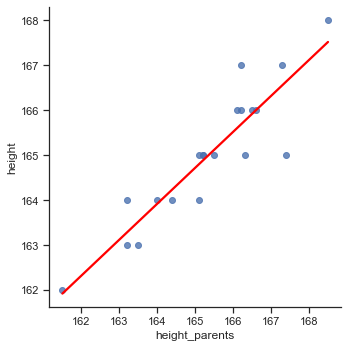

In [65]:
# plot regression line
sns.lmplot(x="height_parents", y="height", data=df, line_kws={"color": "red"}, height=5, ci=None);


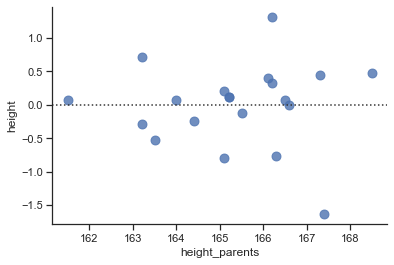

In [66]:
sns.residplot(x="height_parents", y="height", data=df, scatter_kws={"s": 80});

In [67]:
# explained sum of squares (SS_M = TSS - SS_R)
SSM = TSS - SSR
print(SSM)

# explained sum of squares (SS_M) from statsmodel function
lm.ess

34.636800295584585


34.636800295584585

In [68]:
# r_squared: explained sum of squared residuals
r_squared = SSM / TSS
print(r_squared)

0.8246857213234425


In [69]:
# r_squared of statsmodel
lm.rsquared

0.8246857213234425

In [70]:
# adjusted r_squared
lm.rsquared_adj

0.814946039174745

### Pearsons Correlation Coefficient

In [71]:
# correlation coefficient r
r = np.sqrt(r_squared)
print(r)

0.9081220850323168


In [73]:
# correlation coefficient with p-value
stats.pearsonr(df["height"], df["height_parents"])

(0.9081220850323176, 3.1620961459249386e-08)

### Mean Squared Error